<a href="https://www.kaggle.com/code/abdelazizsami/project-building-a-retail-inventory-management-sys?scriptVersionId=198563298" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

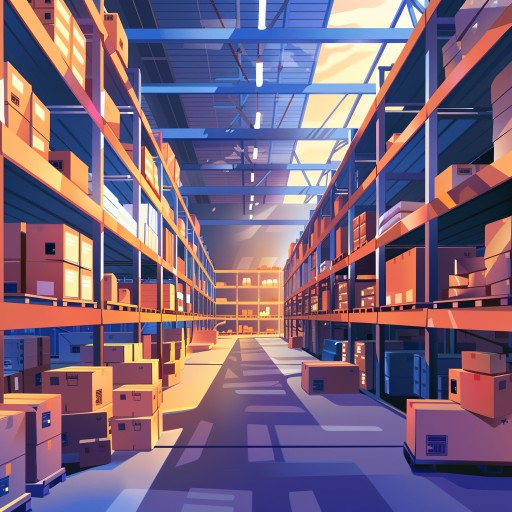

In this project, you will develop a comprehensive inventory management system for a retail business by applying your knowledge in object-oriented programming (OOP) in Python. Imagine you are working for an e-commerce company called `ShopSmart`, a rapidly growing online retailer that sells a wide range of products, including electronics, clothing, and home goods. As the company expands, efficiently managing inventory becomes crucial to ensure smooth operations and customer satisfaction.

Object-oriented programming (OOP) is a programming paradigm that organizes software design around data or objects rather than functions and logic. OOP allows for modular, reusable, and maintainable code, which is particularly beneficial for complex systems like inventory management systems.

You will define two classes `Product` and `Order`, using the implementation requirements detailed below:

# `Product`

- Constructor parameter(s): `self`, `product_id`, `name`, `category`, `quantity`, `price`, and `supplier`.
- Class-level variable(s): `inventory`.

## `Product` class method(s)

### `add_product()`
- Parameter(s): `cls`, `name`, `category`, `quantity`, `price`, and `supplier`.
- Behavior: 
    - Define the `product_id` assuming it's auto-generated incrementally, without any duplicate `product_id` values.
    - Define a `new_product` variable that will call the constructor of the Product class.
    - Return the message `"Product added successfully"` to know that the product was added successfully.

### `update_product()`
- Parameter(s): `cls`, `product_id`, `quantity`, `price`, and `supplier`.
    - `quantity`, `price`, and `supplier` should have default values of `None`. 
- Behavior: 
    - Check if the `product_id` already exists in the `inventory`.
    - If `product_id` exists, check for the given parameters in the method if they have a value and update accordingly the product.
    - Return either one of these messages: `"Product information updated successfully"` or `"Product not found"`.

### `delete_product()`
- Parameter(s): `cls`, `product_id`.
- Behavior: 
    - Check in the inventory list if the given `product_id` was passed as a parameter.
    - If `product_id` exists then remove the product from the list.
    - Return either one of these messages: `"Product deleted successfully"` or `"Product not found"`.


# `Order`

- Constructor parameter(s): `self`, `order_id`, `products`, and `customer_info`.
    - `customer_info` should have a default value of `None`. 

## `Order` method(s)

### `place_order()`
- Parameter(s): `self`, `product_id`, `quantity`, and `customer_info`.
    - `customer_info` should have a default value of `None`.
- Behavior: 
    - Append to the `products` list a tuple containing `product_id` and `quantity`.
    - Assume that each order can only take **one** product. 
    - Return the message: `"Order placed successfully. Order ID: {self.order_id}"`.

As an example, your code must be able to create products like this:

`p1 = Product.add_product("Laptop", "Electronics", 50, 1000, "Supplier A")`

Update them like this:

`update_p1 = Product.update_product(1, quantity=45, price=950)`

Delete them like this:

`delete_p1 = Product.delete_product(1)`

And, create and place orders like this:

`order = Order(order_id=1, products=[])`

`order_placement = order.place_order(1, 2, customer_info="John Doe")`


**Complete** the following code so that the classes perform the same behavior as the examples provided.

In [1]:
class Product:
    inventory = []  # Class-level variable to store all products. This is shared among all instances of Product.

    def __init__(self, product_id, name, category, quantity, price, supplier):
        # The __init__ method is the constructor. It initializes a new instance of the Product class.
        self.product_id = product_id  # Instance variable to store the product's ID.
        self.name = name  # Instance variable to store the product's name.
        self.category = category  # Instance variable to store the product's category.
        self.quantity = quantity  # Instance variable to store the quantity of the product.
        self.price = price  # Instance variable to store the price of the product.
        self.supplier = supplier  # Instance variable to store the supplier of the product.
        Product.inventory.append(self)  # Add this new product instance to the class-level inventory list.

    @classmethod
    def add_product(cls, name, category, quantity, price, supplier):
        # This is a class method that adds a new product to the inventory.
        product_id = cls.inventory[-1].product_id + 1 if len(cls.inventory)>0 else 1  # Generate a new product ID by counting existing products and adding 1.
        new_product = cls(product_id, name, category, quantity, price, supplier)  # Create a new product instance.
        return "Product added successfully"  # Return a confirmation message.

    @classmethod
    def update_product(cls, product_id, quantity=None, price=None, supplier=None):
        # This class method updates the details of an existing product.
        for product in cls.inventory:  # Loop through the inventory to find the product with the given ID.
            if product.product_id == product_id:  # Check if this is the product we want to update.
                if quantity is not None:  # If a new quantity is provided, update it.
                    product.quantity = quantity
                if price is not None:  # If a new price is provided, update it.
                    product.price = price
                if supplier is not None:  # If a new supplier is provided, update it.
                    product.supplier = supplier
                return "Product information updated successfully"  # Return a confirmation message.
        return "Product not found"  # If the product ID was not found, return this message.

    @classmethod
    def delete_product(cls, product_id):
        # This class method deletes a product from the inventory.
        for i, product in enumerate(cls.inventory):  # Loop through the inventory with index to find the product.
            if product.product_id == product_id:  # Check if this is the product we want to delete.
                del cls.inventory[i]  # Delete the product from the inventory list.
                return "Product deleted successfully"  # Return a confirmation message.
        return "Product not found"  # If the product ID was not found, return this message.


class Order:
    def __init__(self, order_id, products, customer_info=None):
        # The __init__ method is the constructor. It initializes a new instance of the Order class.
        self.order_id = order_id  # Instance variable to store the order's ID.
        self.products = products  # Instance variable to store the list of products in the order. Each product is represented as a tuple (product_id, quantity).
        self.customer_info = customer_info  # Instance variable to store optional customer information.

    def place_order(self, product_id, quantity, customer_info=None):
        # This method adds a product to the order.
        for product in Product.inventory:
            if product.product_id == product_id and product.quantity >= quantity: # Check that the product exist in the inventory and that there's stock
                product.quantity -= quantity  # Update the stock of the product by reducing it by the ordered quantity
                self.products.append((product_id, quantity))  # Add the product and quantity as a tuple to the order's products list.
                if customer_info:  # If customer information is provided, update it.
                    self.customer_info = customer_info
                return f"Order placed successfully. Order ID: {self.order_id}"  # Return a confirmation message with the order ID.
        return "Order could not be placed. Product not found or insufficient quantity."
